In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import random
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import  util


C:\Users\Peter\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
raw_embeddings_intact0=np.load("syn_nar_texts/syn_narr_5.npy")
raw_embeddings_only_words=np.load("synthetic_narrative_embeddings/syn_nar_5_only_words.npy")
raw_embeddings_intact1=np.load("synthetic_narrative_embeddings/syn_nar_5_intact.npy")
raw_embeddings_shuffled1=np.load("synthetic_narrative_embeddings/syn_nar_5_shuffled.npy")
random_file= "C:/multi_syn_random/syn_nar_%s/shuffled/embeddings/embeddings_%s_shuffled.npy" % (5,5)
raw_embeddings_random1=np.load(random_file)



shuffled_states_file="C:/multi_syn_embed_shuffle/syn_nar_0/shuffled/data/syn_nar_0_shuffled_16.npy"
shuffled_states_file="C:/multi_syn_random_0_1/syn_nar_0/shuffled/data/syn_nar_0_shuffled_16.npy"
random_states_file="C:/multi_syn_random/syn_nar_0/shuffled/data/syn_nar_0_shuffled_16.npy"
#C:\multi_syn_embed_shuffle\syn_nar_0\shuffled\data
shuffled_states=np.load(shuffled_states_file)
random_states=np.load(random_states_file)

In [3]:
raw_embeddings_intact0==raw_embeddings_intact1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [4]:
print(raw_embeddings_intact0.shape)
print(raw_embeddings_intact1.shape)
print(raw_embeddings_shuffled1.shape)
print(raw_embeddings_random1.shape)

(2227, 100)
(2227, 100)
(2227, 100)
(2227, 100)


In [5]:
sim_true=np.zeros((raw_embeddings_intact0.shape[0]))
sim_only_words=np.zeros((raw_embeddings_intact0.shape[0]))
sim_intact=np.zeros((raw_embeddings_intact1.shape[0]))
sim_shuffled=np.zeros((raw_embeddings_intact1.shape[0]))
sim_random=np.zeros((raw_embeddings_intact1.shape[0]))

In [6]:
print(np.std(raw_embeddings_intact0))
print(np.std(raw_embeddings_only_words))
print(np.std(raw_embeddings_intact1))
print(np.std(raw_embeddings_shuffled1))
print(np.std(raw_embeddings_random1))

0.30113683518232726
0.30526091571970576
0.30113683518232726
0.3046409467905097
0.5762625739005955


In [7]:
for i in range(raw_embeddings_intact1.shape[0]-1):
    sim_true[i]= util.pytorch_cos_sim(raw_embeddings_intact0[i],raw_embeddings_intact0[i+1])
    sim_intact[i]= util.pytorch_cos_sim(raw_embeddings_intact1[i],raw_embeddings_intact1[i+1])
    sim_shuffled[i]= util.pytorch_cos_sim(raw_embeddings_shuffled1[i],raw_embeddings_shuffled1[i+1])
    sim_random[i]= util.pytorch_cos_sim(raw_embeddings_random1[i],raw_embeddings_random1[i+1])
    sim_only_words[i]= util.pytorch_cos_sim(raw_embeddings_only_words[i],raw_embeddings_only_words[i+1])


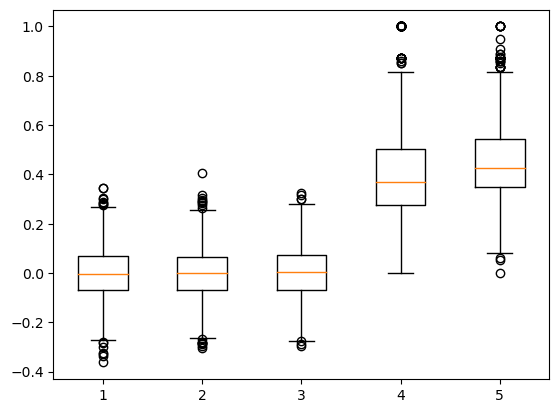

In [47]:
#data_plots=[sim_true,sim_only_words,sim_intact,sim_shuffled,sim_random]
data_plots=[sim_random,sim_shuffled,sim_intact,sim_only_words,sim_true]
plt.boxplot(data_plots)
plt.show()

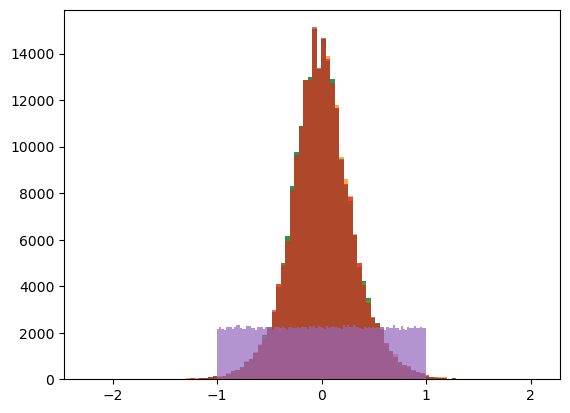

In [9]:
plt.hist(np.ndarray.flatten(raw_embeddings_intact0),bins=100)
plt.hist(np.ndarray.flatten(raw_embeddings_only_words),alpha=0.7,bins=100)
plt.hist(np.ndarray.flatten(raw_embeddings_intact1),alpha=0.7,bins=100)
plt.hist(np.ndarray.flatten(raw_embeddings_shuffled1),alpha=0.7,bins=100)
plt.hist(np.ndarray.flatten(raw_embeddings_random1),alpha=0.7,bins=100)
plt.show()

In [10]:
print(len(np.ndarray.flatten(raw_embeddings_intact1)))
print(len(np.ndarray.flatten(raw_embeddings_shuffled1)))
print(len(np.ndarray.flatten(raw_embeddings_random1)))


222700
222700
222700


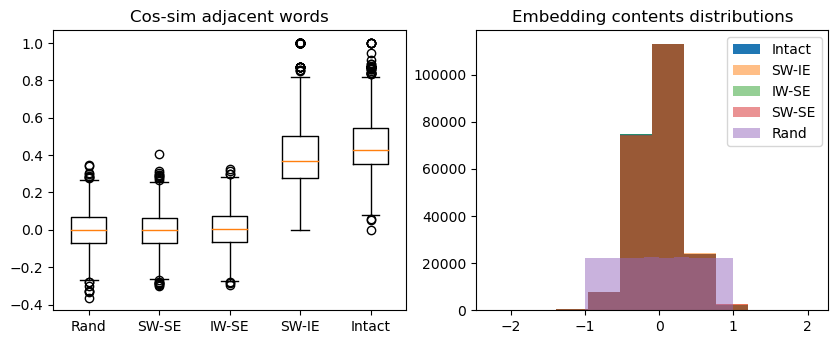

In [48]:
fig= plt.figure(figsize=(10,8))
plt.subplot(221)
plt.boxplot(data_plots)
#plt.xticks([1, 2, 3,4,5], ['Intact', 'SW','SE', 'SE-SW', 'Rand'])
plt.xticks([1, 2, 3,4,5], ['Rand', 'SW-SE','IW-SE', 'SW-IE', 'Intact'])
plt.title('Cos-sim adjacent words')
plt.subplot(222)
alpha_val=0.5
plt.hist(np.ndarray.flatten(raw_embeddings_intact0),label='Intact')
plt.hist(np.ndarray.flatten(raw_embeddings_only_words),label='SW-IE',alpha=alpha_val)
plt.hist(np.ndarray.flatten(raw_embeddings_intact1),label='IW-SE',alpha=alpha_val)
plt.hist(np.ndarray.flatten(raw_embeddings_shuffled1),label='SW-SE',alpha=alpha_val)
plt.hist(np.ndarray.flatten(raw_embeddings_random1),label='Rand',alpha=alpha_val)
plt.title('Embedding contents distributions')
plt.legend()
plt.show()


In [12]:
random_states.shape

(2029, 1000)

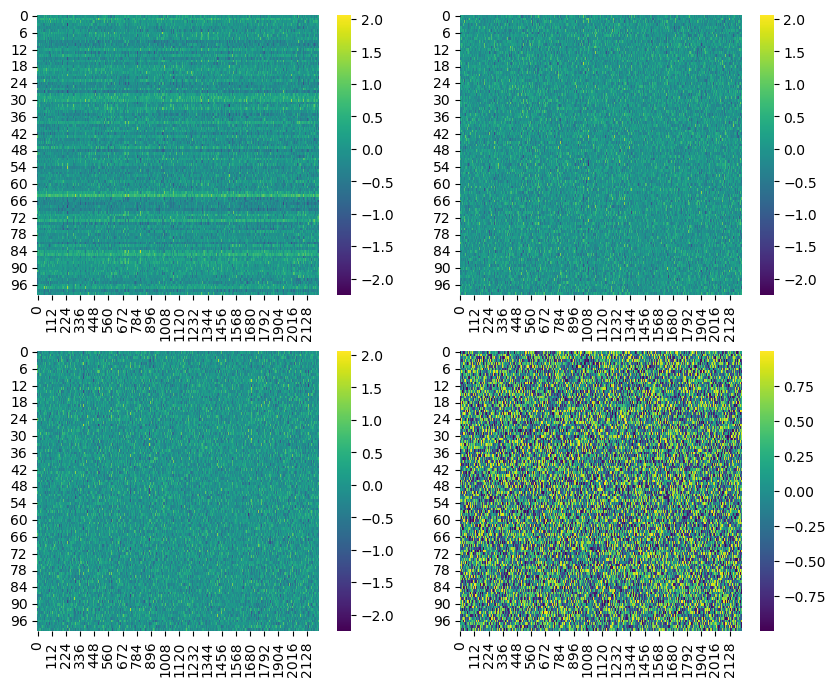

In [13]:
fig= plt.figure(figsize=(10,8))
plt.subplot(221)
sns.heatmap(raw_embeddings_intact0.T,cmap='viridis')
plt.subplot(222)
sns.heatmap(raw_embeddings_intact1.T,cmap='viridis')
plt.subplot(223)
sns.heatmap(raw_embeddings_shuffled1.T,cmap='viridis')
plt.subplot(224)
sns.heatmap(raw_embeddings_random1.T,cmap='viridis')

plt.show()

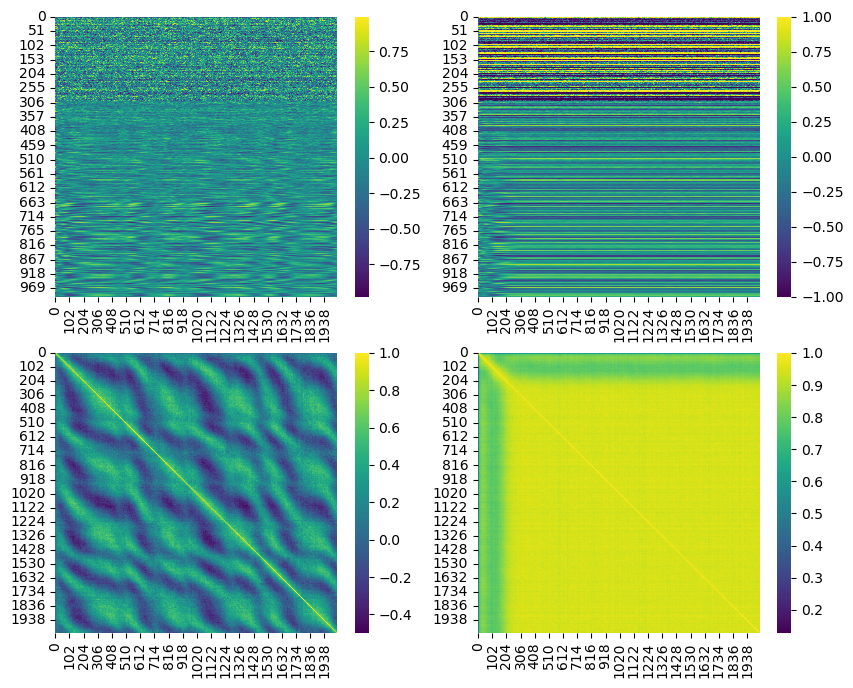

In [14]:
fig= plt.figure(figsize=(10,8))
plt.subplot(221)
sns.heatmap(random_states.T,cmap='viridis')
plt.subplot(222)
sns.heatmap(shuffled_states.T,cmap='viridis')
plt.subplot(223)
sns.heatmap(np.corrcoef(random_states),cmap='viridis')
plt.subplot(224)
sns.heatmap(np.corrcoef(shuffled_states),cmap='viridis')

plt.show()

In [15]:
raw_embeddings_random1.shape

(2227, 100)

In [16]:
fig= plt.figure(figsize=(18,4))
#plt.boxplot(raw_embeddings_intact1[:,:50],showfliers=True,showmeans=True)
#plt.boxplot(raw_embeddings_intact1[:,:50],showfliers=True,showmeans=True)
plt.violinplot(merlin_intact1[:,:50],showmeans=True)
plt.show()

NameError: name 'merlin_intact1' is not defined

<Figure size 1800x400 with 0 Axes>

In [17]:
nar_text=1
current_file = "syn_nar_texts/syn_narr_gt_%d.npy" % (nar_text)
ground_truth_sums = np.load(current_file)
print(ground_truth_sums.shape)

(19,)


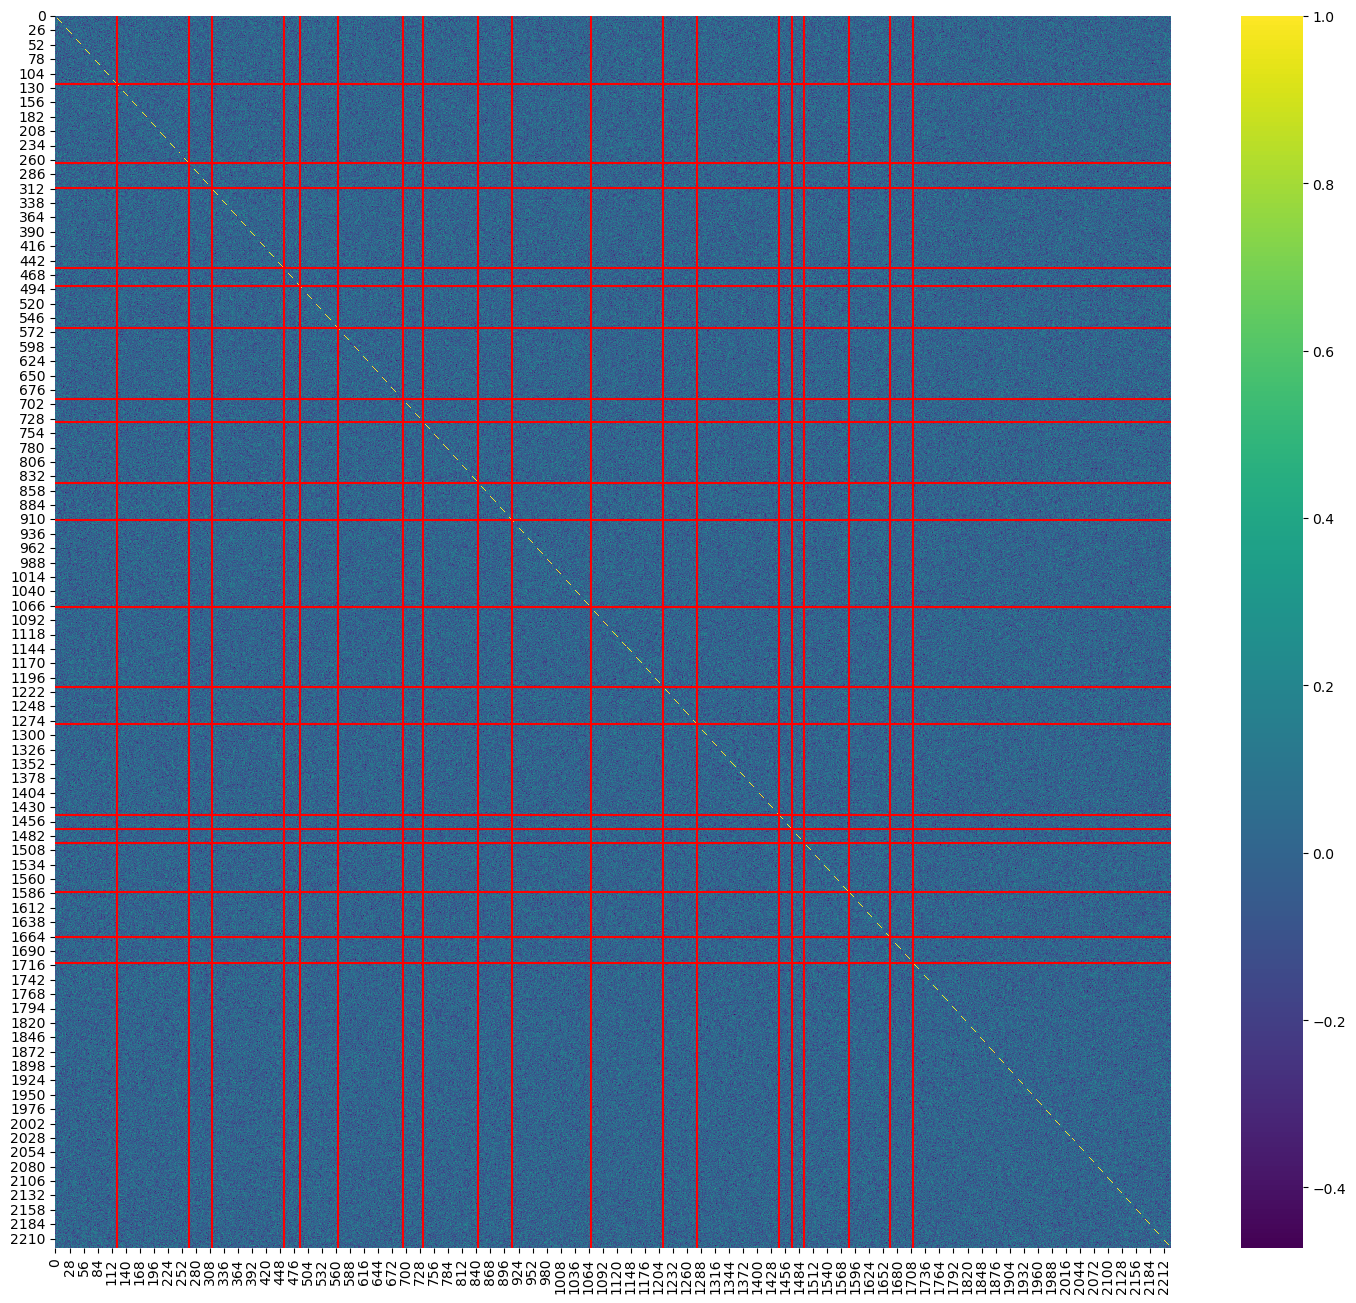

In [18]:
fig= plt.figure(figsize=(18,16))
sns.heatmap(np.corrcoef(raw_embeddings_intact1),cmap='viridis')
for i in range(ground_truth_sums.shape[0]):
    plt.axvline(x=ground_truth_sums[i],c='r')
    plt.axhline(y=ground_truth_sums[i],c='r')
    #plt.plot(ground_truth_sums[i],ground_truth_sums[i],'ro')

plt.show()

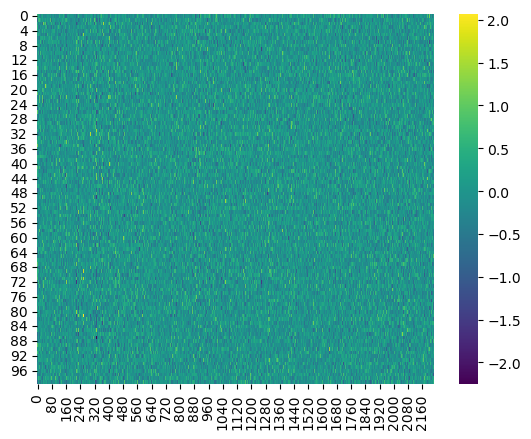

In [19]:
sns.heatmap(raw_embeddings_intact1.T,cmap='viridis')
plt.show()

In [20]:
raw_embeddings_random1.shape

(2227, 100)

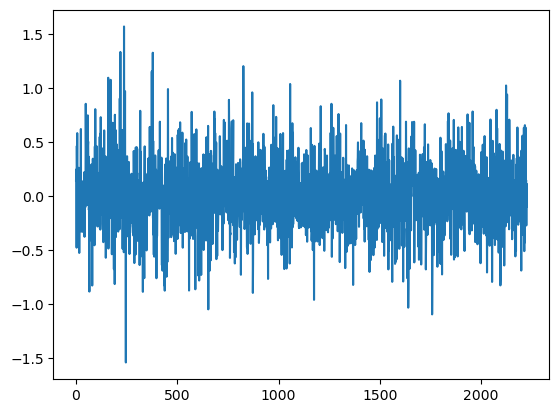

In [21]:
plt.plot(raw_embeddings_intact1[:,80:81])
plt.show()

In [22]:
merlin_intact1=np.load("real_narrative_embeddings/real_nar_sherlock_intact.npy")
merlin_shuffled1=np.load("real_narrative_embeddings/real_nar_sherlock_shuffled.npy")

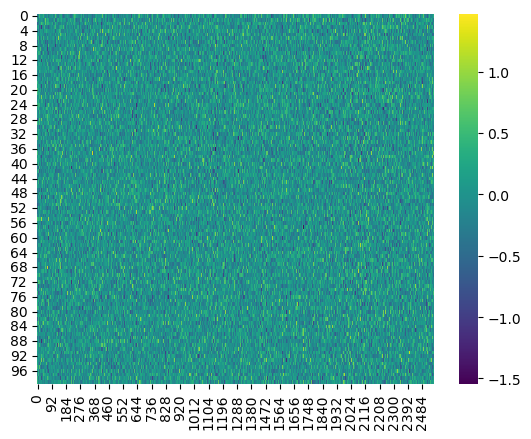

In [23]:
sns.heatmap(merlin_shuffled1.T,cmap='viridis')
plt.show()

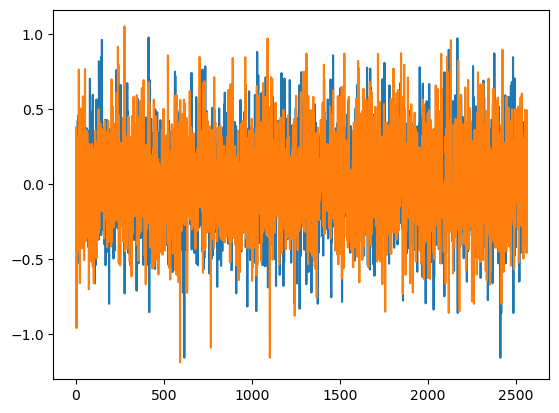

In [24]:
plt.plot(merlin_shuffled1[:,:2])
plt.show()

<Axes: >

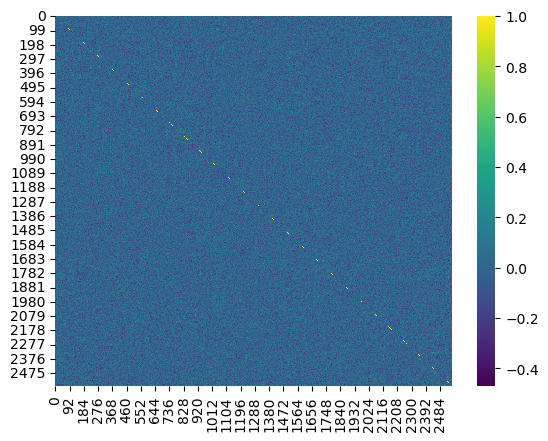

In [25]:
sns.heatmap(np.corrcoef(merlin_shuffled1),cmap='viridis')

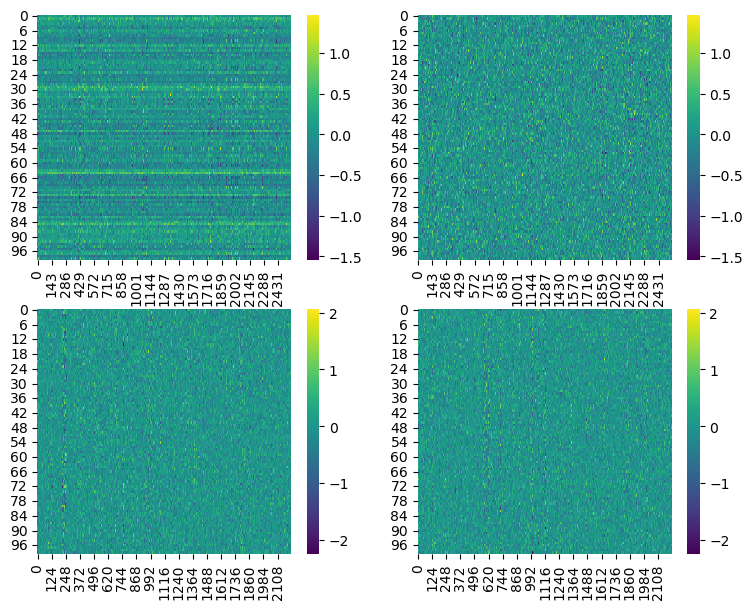

In [26]:
fig= plt.figure(figsize=(9,7))
mycolor='viridis'
plt.subplot(221)
sns.heatmap(merlin_intact1.T,cmap=mycolor)
plt.subplot(222)
sns.heatmap(merlin_shuffled1.T,cmap=mycolor)
plt.subplot(223)
sns.heatmap(raw_embeddings_intact1.T,cmap=mycolor)
plt.subplot(224)
sns.heatmap(raw_embeddings_shuffled1.T,cmap=mycolor)
plt.show()

In [27]:
print("Merlin: ", np.std(merlin_intact1),np.std(merlin_shuffled1)," Syn: ",np.std(raw_embeddings_intact1),np.std(raw_embeddings_shuffled1))
print("axis=0:  ", np.mean(np.std(merlin_intact1,axis=0)),np.mean(np.std(merlin_shuffled1,axis=0)),np.mean(np.std(raw_embeddings_intact1,axis=0)),np.mean(np.std(raw_embeddings_shuffled1,axis=0)))
print("axis=1:  ", np.mean(np.std(merlin_intact1,axis=1)),np.mean(np.std(merlin_shuffled1,axis=1)),np.mean(np.std(raw_embeddings_intact1,axis=1)),np.mean(np.std(raw_embeddings_shuffled1,axis=1)))


Merlin:  0.28156752561112486 0.28156752561112486  Syn:  0.30113683518232726 0.3046409467905097
axis=0:   0.21829611183017822 0.28148293721252027 0.3010382672855524 0.3045054834609462
axis=1:   0.2735884012490582 0.27358840124905814 0.28844329699293003 0.2905352485375712


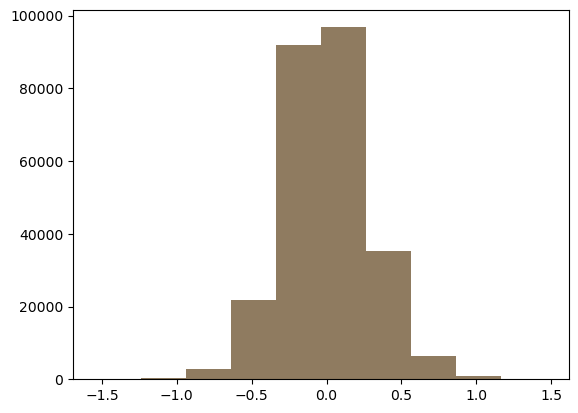

In [28]:
plt.hist(np.ndarray.flatten(merlin_intact1))
plt.hist(np.ndarray.flatten(merlin_shuffled1),alpha=0.5)
plt.show()

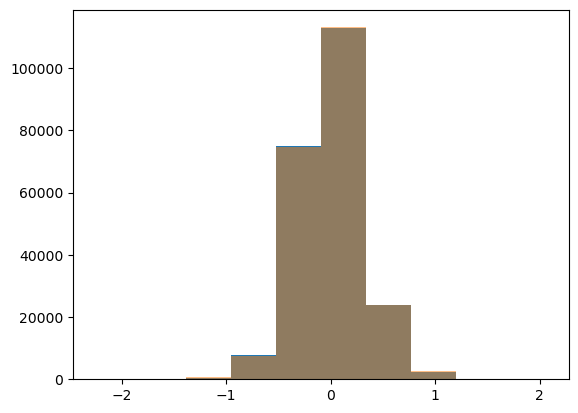

(2227, 100) (2227, 100)


In [29]:
plt.hist(np.ndarray.flatten(raw_embeddings_intact1))
plt.hist(np.ndarray.flatten(raw_embeddings_shuffled1),alpha=0.5)
plt.show()
print(raw_embeddings_intact1.shape,raw_embeddings_shuffled1.shape)

In [30]:

# Calculate the variance along axis 0 (rows)

row_std_intact = np.mean(np.std(raw_embeddings_intact1, axis=0))
col_std_intact = np.mean(np.std(raw_embeddings_intact1, axis=1))

row_std_shuffled = np.mean(np.std(raw_embeddings_shuffled1, axis=0))
col_std_shuffled = np.mean(np.std(raw_embeddings_shuffled1, axis=1))

print(row_std_intact,col_std_intact)
print(row_std_shuffled,col_std_shuffled)

0.3010382672855524 0.28844329699293003
0.3045054834609462 0.2905352485375712


In [31]:
np.std(raw_embeddings_shuffled1)

0.3046409467905097

In [32]:
row_std_intact=np.zeros((8))

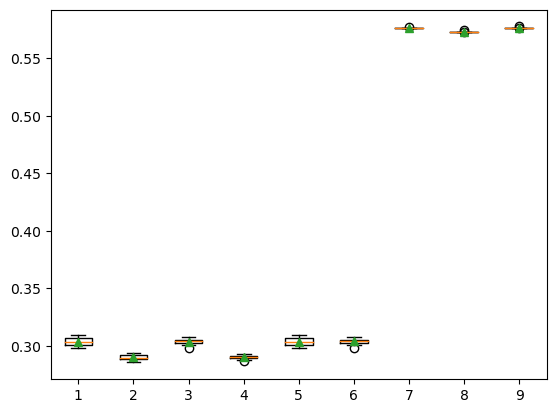

In [33]:
row_std_intact=np.zeros((8))
col_std_intact=np.zeros((8))
row_std_shuffled=np.zeros((8))
col_std_shuffled=np.zeros((8))
row_std_random=np.zeros((8))
col_std_random=np.zeros((8))
std_intact=np.zeros((8))
std_shuffled=np.zeros((8))
std_random=np.zeros((8))
count=0
for nar_text in range(0,8):
    intact_file = "synthetic_narrative_embeddings/syn_nar_%s_intact.npy" % (nar_text)
    intact_data=np.load(intact_file)
    # for comparison intact
    intact_synthetic_embeddings=np.load(intact_file)
    shuffled_file = "synthetic_narrative_embeddings/syn_nar_%s_shuffled.npy" % (nar_text)
    shuffled_data=np.load(shuffled_file)
    random_file= "C:/multi_syn_random/syn_nar_%s/shuffled/embeddings/embeddings_%s_shuffled.npy" % (nar_text, nar_text)
    random_data=np.load(random_file)
    
    
    row_std_intact[count] = np.mean(np.std(intact_data, axis=0))
    col_std_intact[count] = np.mean(np.std(intact_data, axis=1))
    std_intact[count] = np.std(intact_data)

    row_std_shuffled[count] = np.mean(np.std(shuffled_data, axis=0))
    col_std_shuffled[count] = np.mean(np.std(shuffled_data, axis=1))
    std_shuffled[count] = np.std(shuffled_data)

    row_std_random[count] = np.mean(np.std(random_data, axis=0))
    col_std_random[count] = np.mean(np.std(random_data, axis=1))
    std_random[count] = np.std(random_data)
    
    count=count+1

data_syn=[row_std_intact,col_std_intact, row_std_shuffled,col_std_shuffled, std_intact,std_shuffled,row_std_random,col_std_random, std_random]
plt.boxplot(data_syn,showmeans=True)
plt.show()

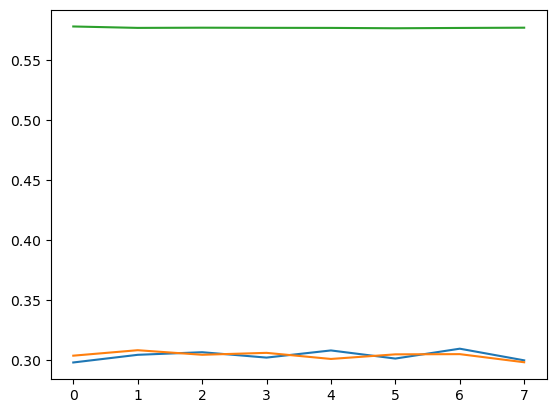

In [34]:
plt.plot(std_intact)
plt.plot(std_shuffled)
plt.plot(std_random)
plt.show()

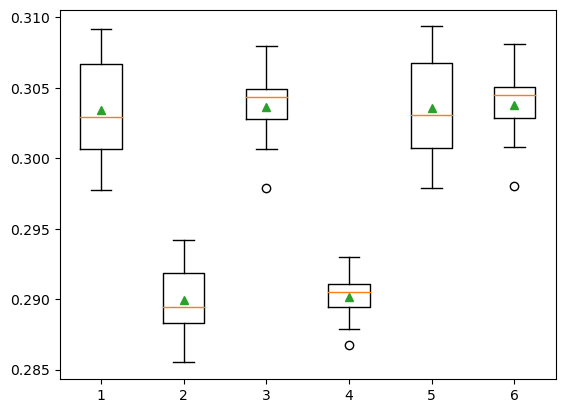

In [35]:
row_std_intact=np.zeros((8))
col_std_intact=np.zeros((8))
row_std_shuffled=np.zeros((8))
col_std_shuffled=np.zeros((8))
std_intact=np.zeros((8))
std_shuffled=np.zeros((8))
count=0
for nar_text in range(0,8):
    intact_file = "synthetic_narrative_embeddings/syn_nar_%s_intact.npy" % (nar_text)
    intact_data=np.load(intact_file)
    shuffled_file = "synthetic_narrative_embeddings/syn_nar_%s_shuffled.npy" % (nar_text)
    shuffled_data=np.load(shuffled_file)
    
    row_std_intact[count] = np.mean(np.std(intact_data, axis=0))
    col_std_intact[count] = np.mean(np.std(intact_data, axis=1))
    std_intact[count] = np.std(intact_data)

    row_std_shuffled[count] = np.mean(np.std(shuffled_data, axis=0))
    col_std_shuffled[count] = np.mean(np.std(shuffled_data, axis=1))
    std_shuffled[count] = np.std(shuffled_data)
    
    count=count+1

data_syn=[row_std_intact,col_std_intact, row_std_shuffled,col_std_shuffled, std_intact,std_shuffled]
plt.boxplot(data_syn,showmeans=True)
plt.show()

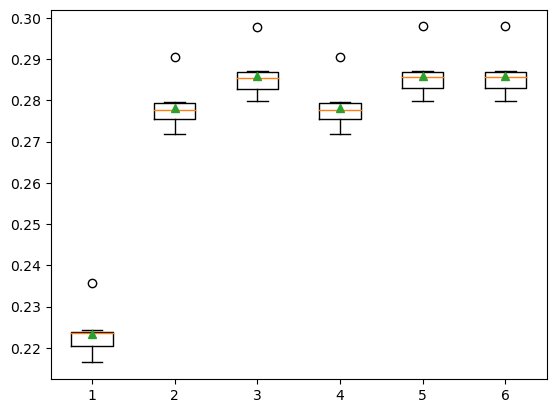

In [36]:
row_std_intact=np.zeros((8))
col_std_intact=np.zeros((8))
row_std_shuffled=np.zeros((8))
col_std_shuffled=np.zeros((8))
std_intact=np.zeros((8))
std_shuffled=np.zeros((8))
count=0
for nar_text in ["sherlock", "merlin", "pieman", "black", "forgot", "21styear", "bronx", "piemanpni"]:
    intact_file = "real_narrative_embeddings/real_nar_%s_intact.npy" % (nar_text)
    intact_data=np.load(intact_file)

    #print("intact file", intact_file)
    shuffled_file = "real_narrative_embeddings/real_nar_%s_shuffled.npy" % (nar_text)
    shuffled_data=np.load(shuffled_file)
    #random.shuffle(shuffled_data)
    #print("shuffled file", shuffled_file)
   
    row_std_intact[count] = np.mean(np.std(intact_data, axis=0))
    col_std_intact[count] = np.mean(np.std(intact_data, axis=1))
    std_intact[count] = np.std(intact_data)

    row_std_shuffled[count] = np.mean(np.std(shuffled_data, axis=0))
    col_std_shuffled[count] = np.mean(np.std(shuffled_data, axis=1))
    std_shuffled[count] = np.std(shuffled_data)

    count=count+1

data=[row_std_intact,col_std_intact, row_std_shuffled,col_std_shuffled, std_intact,std_shuffled]
plt.boxplot(data,showmeans=True)
plt.show()

(2029, 100) (2029, 100)
0.29787439398035553 0.3035413782002969
(1834, 100) (1834, 100)
0.30425239508587104 0.30809495894145655
(2087, 100) (2087, 100)
0.306418855857668 0.30429352197128184
(2068, 100) (2068, 100)
0.30194107839768863 0.3058899798530259
(1813, 100) (1813, 100)
0.307903042000381 0.30081297353149716
(2227, 100) (2227, 100)
0.30113683518232726 0.3046409467905097
(1753, 100) (1753, 100)
0.3093593698703425 0.30482429028402697
(1774, 100) (1774, 100)
0.29965126989873186 0.29805959676672733


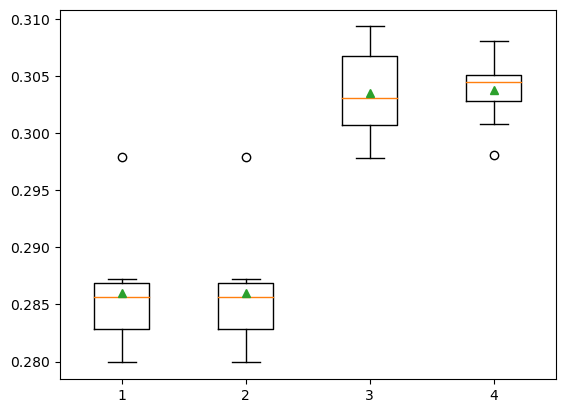

In [37]:
real_narrative_intact=np.zeros((8))
real_narrative_shuffled=np.zeros((8))
syn_narrative_intact=np.zeros((8))
syn_narrative_shuffled=np.zeros((8))

count=0
for nar_text in range(0,8):
    intact_file = "synthetic_narrative_embeddings/syn_nar_%s_intact.npy" % (nar_text)
    intact_data=np.load(intact_file)
    shuffled_file = "synthetic_narrative_embeddings/syn_nar_%s_shuffled.npy" % (nar_text)
    shuffled_data=np.load(shuffled_file)
    syn_narrative_intact[count] = np.std(intact_data)
    syn_narrative_shuffled[count] = np.std(shuffled_data)
    print(intact_data.shape,shuffled_data.shape)
    print(np.std(intact_data),np.std(shuffled_data))

    count=count+1
count=0
for nar_text in ["sherlock", "merlin", "pieman", "black", "forgot", "21styear", "bronx", "piemanpni"]:
    intact_file = "real_narrative_embeddings/real_nar_%s_intact.npy" % (nar_text)
    intact_data=np.load(intact_file)
    shuffled_file = "real_narrative_embeddings/real_nar_%s_shuffled.npy" % (nar_text)
    shuffled_data=np.load(shuffled_file)
    real_narrative_intact[count] = np.std(intact_data)
    real_narrative_shuffled[count] = np.std(shuffled_data)
    count=count+1

data=[real_narrative_intact,real_narrative_shuffled,syn_narrative_intact,syn_narrative_shuffled]
plt.boxplot(data,showmeans=True)
plt.show()

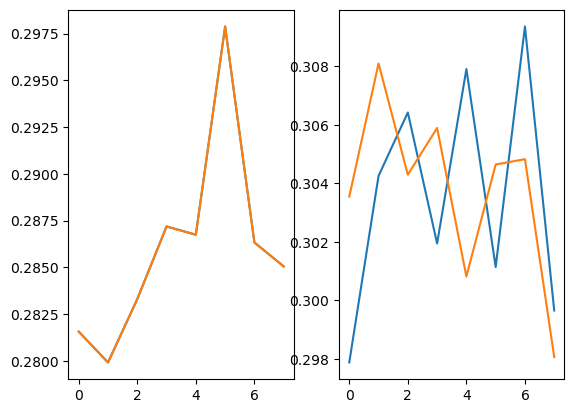

In [38]:
plt.subplot(121)
plt.plot(real_narrative_intact)
plt.plot(real_narrative_shuffled)
plt.subplot(122)
plt.plot(syn_narrative_intact)
plt.plot(syn_narrative_shuffled)
plt.show()
#,syn_narrative_intact,syn_narrative_shuffled])

In [39]:
std_intact==std_shuffled

array([ True,  True,  True,  True, False, False,  True, False])

In [40]:
intact_data == shuffled_data

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [41]:
print(col_std_intact[1])
print(col_std_shuffled[1])

0.2719088382849401
0.27190883828494017


In [42]:
col_std_intact==col_std_shuffled

array([False, False,  True, False, False, False,  True, False])

In [43]:
print(col_std_intact)
print(col_std_shuffled)

[0.2735884  0.27190884 0.27592759 0.2795899  0.27925509 0.29038081
 0.27782317 0.2774151 ]
[0.2735884  0.27190884 0.27592759 0.2795899  0.27925509 0.29038081
 0.27782317 0.2774151 ]


In [44]:
for i in range(6):
    print(stats.ttest_ind(a=data[i], b=data_syn[i], equal_var=True))

Ttest_indResult(statistic=-7.23711243256713, pvalue=4.309100045709019e-06)
Ttest_indResult(statistic=-1.8152843394154203, pvalue=0.09095619256186901)
Ttest_indResult(statistic=-0.039871666727541305, pvalue=0.9687584568563661)
Ttest_indResult(statistic=10.420284421216447, pvalue=5.5965768732943e-08)


IndexError: list index out of range

In [ ]:
print(stats.ttest_ind(a=std_shuffled, b=std_random, equal_var=True))

In [ ]:
print(stats.ttest_ind(a=data[5], b=data_syn[8], equal_var=True))

In [ ]:
plt.boxplot(data)
plt.boxplot(data_syn)
plt.show()

In [ ]:
row_std_intact=0
col_std_intact=0
row_std_shuffled=0
col_std_shuffled=0

for nar_text in range(0,8):
    intact_file = "synthetic_narrative_embeddings/syn_nar_%s_intact.npy" % (nar_text)
    intact_data=np.load(intact_file)
    shuffled_file = "synthetic_narrative_embeddings/syn_nar_%s_shuffled.npy" % (nar_text)
    shuffled_data=np.load(shuffled_file)
    
    row_std_intact = row_std_intact + np.mean(np.std(intact_data, axis=0))
    col_std_intact = col_std_intact + np.mean(np.std(intact_data, axis=1))

    row_std_shuffled = row_std_shuffled + np.mean(np.std(shuffled_data, axis=0))
    col_std_shuffled = col_std_shuffled + np.mean(np.std(shuffled_data, axis=1))

print(row_std_intact,col_std_intact)
print(row_std_shuffled,col_std_shuffled)

In [ ]:
test=np.random.rand(1774,100)

In [ ]:
print(np.std(test))
print(np.mean(np.std(test, axis=1)))
print(np.mean(np.std(test, axis=0)))

In [ ]:
random.shuffle(test)

In [ ]:
print(np.std(test))
print(np.mean(np.std(test, axis=1)))
print(np.mean(np.std(test, axis=0)))

In [ ]:
np.std(test)

In [ ]:
res=0
syn_shuf_embeddings=np.load("c:/multi_syn_embed_shuffle/syn_nar_6/intact/data/syn_nar_6_intact_%d.npy" % res)
syn_shuf_words=np.load("G:/Mon Drive/GoogleWIP/Projects/fMRI-ML/reservoir-isc/multi_syn_txt_data/syn_nar_6/shuffled/data/syn_nar_6_shuffled_%d.npy" %res)
ground=np.load("syn_nar_texts/syn_narr_gt_6.npy")
syn_narr_6=np.load("syn_nar_texts/syn_narr_6.npy")
syn_narr_7=np.load("syn_nar_texts/syn_narr_7.npy")

sherlock_shuffle_words=np.load("G:/Mon Drive/GoogleWIP/Projects/fMRI-ML/reservoir-isc/comparisonShuffle/TrueTrueFalse/mod_in_True_mod_topTrue_Direct_False_%d.npy" % res)
sherlock_shuffle_embeddings=np.load("G:/Mon Drive/GoogleWIP/Projects/fMRI-ML/reservoir-isc/embedding_data/scrambled_embeddings/TrueTrueFalse/mod_in_True_mod_topTrue_Direct_False_%d.npy" % res) 
